### Import Packages & Modules
Import the neccessary packages for this project.

1. Tensorflow (https://www.tensorflow.org/)
    - Open source platform for large scale machine learning./n

2. Keras (https://keras.io/)
    - Deep-learning library.
    - For this project we will initilize Keras from within the Tensorflow package



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np # Numpy, for matrix and vector work
import matplotlib.pyplot as plt # Pyplot, for visualisation 

### Import Data 
For this step we will import the data from the Fashion MNIST Dataset.

This is an open source dataset and can be loaded from the Keras library.

(https://keras.io/api/datasets/) 


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

###### Notes
- Loading the dataset returns four NumPy arrays:
    - The train_images and train_labels arrays are the training set—the data the model uses to learn.
    - The model is tested against the test set, the test_images, and test_labels arrays.
    - The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
    - The labels are an array of integers, ranging from 0 to 9. 
<br><br>

These correspond to the class of clothing the image represents:
    
Label - Class
<br><br>
0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot
<br><br>
We can create a mapping in list format to allow us to easily remember these label - class definitions

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration
##### 1. Test Data
Lets start by looking at the shape of the training data first

In [4]:
print('Training Data:')
print(train_images.shape)
print(f'''We have {train_images.shape[0]} images, 
that are {train_images.shape[1]}x{train_images.shape[2]} pixels\n''')

print('\nTraining Data - Labels:')
print(len(train_labels))

Training Data:
(60000, 28, 28)
We have 60000 images, 
that are 28x28 pixels


Training Data - Labels:
60000


###### 2. Test Data

In [5]:
print('Test Data:')
print(test_images.shape)
print(f'''We have {test_images.shape[0]} images, 
that are {test_images.shape[1]}x{test_images.shape[2]} pixels\n''')

print('\nTest Data - Labels:')
print(len(test_labels))

Test Data:
(10000, 28, 28)
We have 10000 images, 
that are 28x28 pixels


Test Data - Labels:
10000


###### 3. Labels
To confirm, the training labels are all values between 0-9

In [6]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


###### 4. Single Sample

Lets look at a sample image

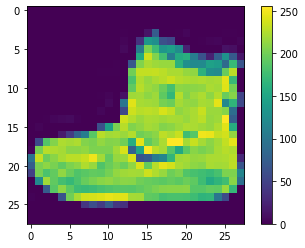

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

And validate that its label is correct for our sample image:

In [8]:
print(f"Label: {train_labels[0]}") 
print(f"Class: {class_names[train_labels[0]]}")

Label: 9
Class: Ankle boot


But what does this image look like in the data?

In [9]:
np.set_printoptions(linewidth=150)
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

##### 5. Multiple Images
Now lets validate across multiple images

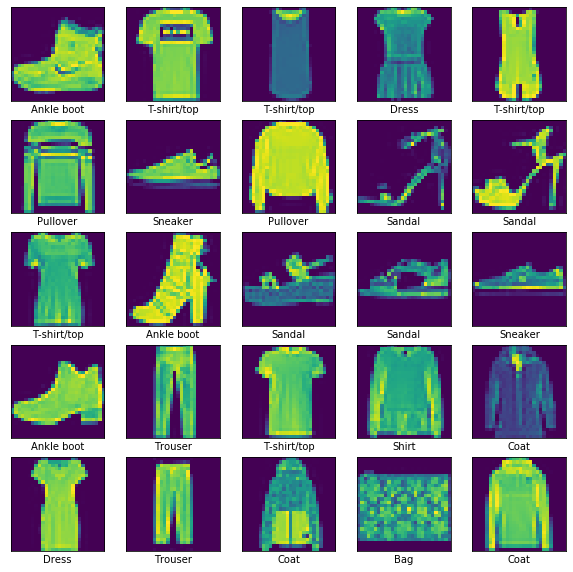

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Data Pre-processing
The data must be preprocessed before training the network. 

If you inspect the first image in the training set (as shown above), you will see that the pixel values fall in the range of 0 to 255:

Scale these values to a range of 0 to 1 before feeding them to the neural network model. 

To do so, divide the values by 255. 

It's important that the training set and the testing set be preprocessed in the same way:

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Model Build

#### 1. Neural Network Aechitecture/Layer Setup
For this demonstartion we will use a simple 3 layer (shallow) network.<br><br>

**Input Layer**<br> 
The first layer in this network (input layer), tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). <br> <br> 
Think of this layer as unstacking rows of pixels in the image and lining them up. <br>
This layer has no parameters to learn; it only reformats the data.<br><br>

**Hidden Layer**<br>
The hidden layer is make up of 128 nodes that uses the rectified linear unit activation function. 
- For more details on different activation functions available in Keras see:
    - https://keras.io/api/layers/activations/
<br><br>

**Output Layer**<br>
The output layer has 10 nodes, 1 for each image category. <br>
Each node contains a score that indicates the confidence that the current image belonging to one of the 10 classes.<br><br>

**Model Architecture:** <br>
784 -> 128 -> 10




In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), ## Input Layer - takes the 28x28 pixel and flattens
    keras.layers.Dense(128, activation='relu'), ## Hidden layer using rectified linear unit activation function
    keras.layers.Dense(10) ## output layer (Note: 10 nodes for each clotheing category)
])



#### 2. Model Hyperparameters
Before the model is ready for training, it needs a few more settings. <br>
In Keras, these are added during the model's compile step.<br><br>

- Loss function — The logic/measure used to ensure the model is converging. The aim is to minimize this loss function as the model trains. <br>
- Optimizer — This is how the model is updated based on the data it sees and its loss function. Keras optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers<br>
- Metrics —Used to monitor the training and testing steps. We will use accuracy as our metric in this example.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training
Next step is to begin the model training. <br>
The inputs to Keras .fit function are the X (feature set) and y (target data). <br><br>
We will also add additional epochs (10 in this case).<br>
The epoch value is used to run the model multiple times over the same training set to increase model learning.<br>



In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.5004 - accuracy: 0.8230
Epoch 2/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3734 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3364 - accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3119 - accuracy: 0.8875
Epoch 5/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.2952 - accuracy: 0.8911
Epoch 6/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.2802 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.2691 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2593 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2521 - accuracy: 0.90

###### Notes:
As you can see the model ran 10 times over the training data and increased accuracy through each step (with the loss function naturally decreasing in contrast)

### Test Model
Lets now test the model on our Test Dataset.<br>

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose = 2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2585 - accuracy: 0.8859

Test accuracy: 0.8859


As you can see we lose some accuracy compared to training (small degrees of overfitting are to be expected).<br>
However performance is still very good at >88%

### Model Output Analysis & Validation

###### 1. Create Probability Output
Lets start by converting the logit output provided by our model currently to a probability output. <br>
Keras provides us with a Softmax() function to do this easily

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

###### 2. Analyse single item
Lets take a look at what the model predicted the probability of the 1st test item was

In [17]:
np.set_printoptions(precision=5, suppress=True) ## Clean up printing for extremely small numbers
print('Probability of each category (0-9):')
print(predictions[0])
print('\nHighest probability category:')
print(f"Category {np.argmax(predictions[0])} () with a probability of {predictions[0].max()}")

Probability of each category (0-9):
[0.      0.      0.      0.      0.      0.00008 0.      0.00744 0.      0.99248]

Highest probability category:
Category 9 () with a probability of 0.9924787282943726


The model is saying that the first item in the training set has a probability >99% of being in the label = 9 category (Ankle Boot). <br><br>

And the image is:


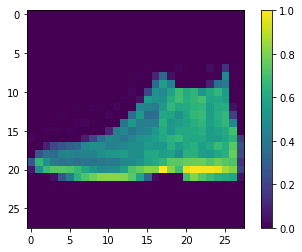

In [18]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

I think its safe to say the model is correct in this instance. <br>
Now lets look at this with a larger scale.

##### 3. Analyse at scale

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

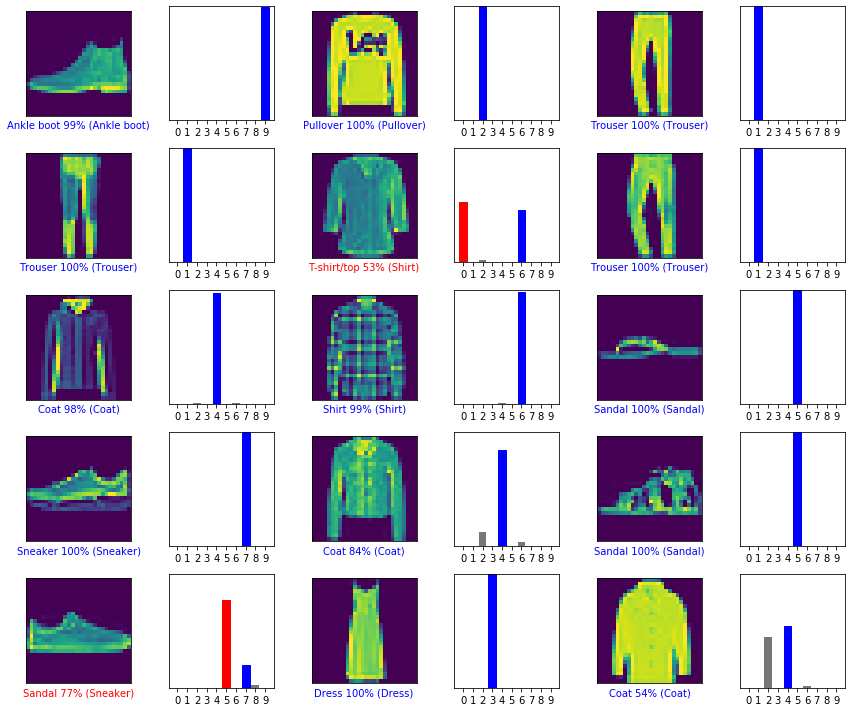

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()